In [1]:
# importing necessary psckages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
test = pd.read_csv("/content/Walmart.csv")

In [3]:
# view data
test.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
# Finding Null values
test.isnull().sum()



,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [5]:
test.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [6]:
# split date in day, month, year
test[["day", "month", "year"]] = test["Date"].str.split("-", expand = True)


In [7]:
print(test.columns)

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'day', 'month', 'year'],
      dtype='object')


Text(0.5, 1.0, 'Basic Histogram')

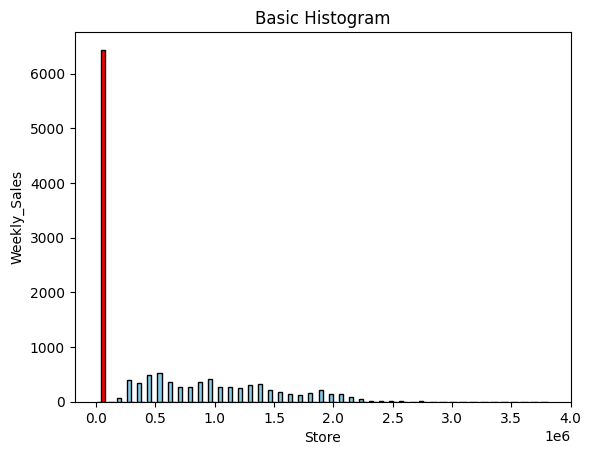

In [8]:
# creating histogram
plt.hist(test[['Weekly_Sales','Store']], bins=45, color=('skyblue','red'), edgecolor='black')
plt.xlabel('Store')
plt.ylabel('Weekly_Sales')
plt.title('Basic Histogram')



<BarContainer object of 6435 artists>

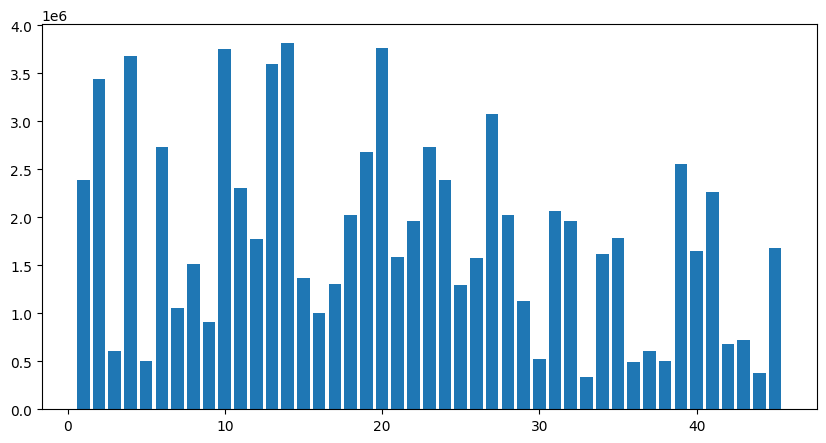

In [9]:
# creating hostogram
plt.figure(figsize=(10,5))
plt.bar(test.Store,test.Weekly_Sales)

In [10]:
#store wise sales
per_store_sales = test.groupby('Store')['Weekly_Sales'].sum()
per_store_sales.head(5)

,Weekly_Sales
Store,
1,2.224028e+08
2,2.753824e+08
3,5.758674e+07
4,2.995440e+08
5,4.547569e+07


In [11]:
test1=test

In [12]:
# Assigning column names
per_store_sales = per_store_sales.to_frame().reset_index()
per_store_sales.columns = ['store', 'sales']
per_store_sales.head(2)

,store,sales
0,1,2.224028e+08
1,2,2.753824e+08


In [13]:
#Corelation between sales and other variables
#sns.pairplot(df, x_vars=['Holiday_Flag','Temperature','Fuel_Price', 'CPI', 'Unemployment'], y_vars='Weekly_Sales', height=4, aspect=1, kind='scatter')
#plt.show()

In [14]:
## Let's see the correlation between different variables.

#sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
#plt.show()

In [15]:
test1.head(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,05,02,2010
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,12,02,2010


In [16]:
#DF = test1['Holiday_Flag','Temperature','Fuel_Price', 'CPI', 'Unemployment','Weekly_Sales']
df = test1.drop(['Store','Date','day','month','year'], axis=1)

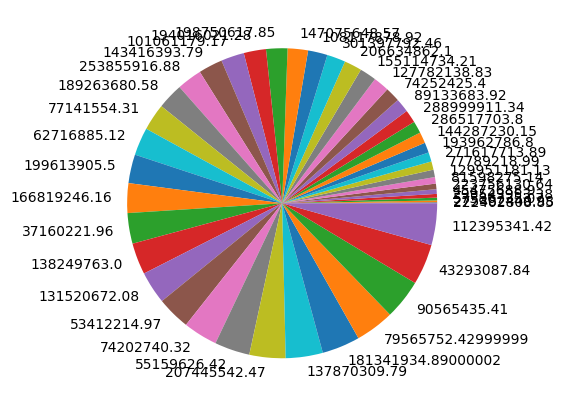

In [17]:
import numpy as np

# Creating plot
fig = plt.figure(figsize =(5, 7))
plt.pie(per_store_sales.store, labels = per_store_sales.sales)

# show plot
plt.show()

In [18]:
import seaborn as sns
plt.figure(figsize=[10,8])

plt.bar(test[:-1], hist, width = 0.5, color='#0504aa',alpha=0.7)
plt.xlim(min(test), max(test))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Normal Distribution Histogram',fontsize=15)
plt.show()

NameError: name 'hist' is not defined

<Figure size 1000x800 with 0 Axes>

In [19]:
# decending order sort
per_store_sales3 = per_store_sales.sort_values(by='sales', ascending=False)
per_store_sales3.head(5)

,store,sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08


Text(0, 0.5, 'sales')

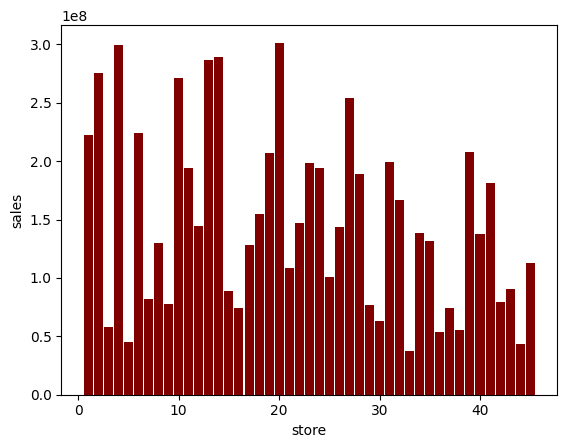

In [21]:
# histogram
plt.bar(per_store_sales.store, per_store_sales.sales, color ='maroon', width = 0.9)
plt.xlabel('store')
plt.ylabel('sales')
#plt.ylim(ymax = 4000, ymin = 2500)



In [22]:
# cumulative percentage
per_store_sales3['cum_percent'] = 100*(per_store_sales3.sales.cumsum() / per_store_sales3.sales.sum())
per_store_sales3

,store,sales,cum_percent
19,20,3.013978e+08,4.473623
3,4,2.995440e+08,8.919730
13,14,2.889999e+08,13.209332
12,13,2.865177e+08,17.462092
1,2,2.753824e+08,21.549571
9,10,2.716177e+08,25.581171
26,27,2.538559e+08,29.349134
5,6,2.237561e+08,32.670328
0,1,2.224028e+08,35.971435
38,39,2.074455e+08,39.050533


In [23]:
test.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,05,02,2010
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,12,02,2010
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,19,02,2010
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,26,02,2010
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,05,03,2010


In [24]:
X = per_store_sales3['store']
y = per_store_sales3['sales']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [26]:
import statsmodels.api as sm


In [27]:
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [28]:
lr.params


,0
const,1.986238e+08
store,-1.923095e+06


In [29]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     3.902
Date:                Thu, 03 Oct 2024   Prob (F-statistic):             0.0578
Time:                        11:47:22   Log-Likelihood:                -603.93
No. Observations:                  31   AIC:                             1212.
Df Residuals:                      29   BIC:                             1215.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.986e+08    2.5e+07      7.939      0.0

In [30]:
#plt.scatter(X_train, y_train)
#plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

In [31]:
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)
reg.score(X, y)
1.0
reg.coef_
array([1., 2.])
reg.intercept_
3.0...
reg.predict(np.array([[3, 5]]))
array([16.])

SyntaxError: invalid syntax (<ipython-input-31-c22a6c2f0115>, line 11)

In [32]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [33]:
(test1.Store).astype(int)

,Store
0,1
1,1
2,1
3,1
4,1
...,...
6430,45
6431,45
6432,45
6433,45


In [34]:
#test1.dtypes.
datatypes = test1.dtypes['Store']
datatypes

dtype('int64')

In [35]:
X1 = test1[['Temperature','Holiday_Flag','Fuel_Price','CPI','Unemployment','month']]


In [36]:
from sklearn.metrics import mean_squared_error, r2_score


In [37]:
import pandas as pd
import chardet
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [38]:
#Store	Date	Weekly_Sales	Holiday_Flag	Temperature	Fuel_Price	CPI	Unemployment	day	month	year
X1 = test1[['Temperature','Holiday_Flag','Fuel_Price','CPI','Unemployment','month']]

# Set the target variable (dependent variable) as the 'SALES' column
y1 = test1['Weekly_Sales']

# Split the dataset into training (80%) and testing (20%) sets using a random seed for reproducibility
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Create a linear regression model object
model = LinearRegression()

# Train the linear regression model using the training data (X_train and y_train)
model.fit(X1_train, y1_train)

# Make predictions on the test data (X_test) using the trained model
y1_pred = model.predict(X1_test)


In [39]:
# Calculate the Mean Squared Error (MSE) between the true sales and predicted sales
mse = mean_squared_error(y1_test, y1_pred)

# Calculate the R-squared score between the true sales and predicted sales
r2 = r2_score(y1_test, y1_pred)

# Print the calculated Mean Squared Error (MSE)
print(f'Mean Squared Error: {mse:.2f}')

# Print the calculated R-squared score
print(f'R2 Score: {r2:.2f}')




Mean Squared Error: 314082320305.34
R2 Score: 0.03


In [ ]:
# Convert the 'ORDERDATE' column to datetime format


# Create a copy of the test set and add the 'ORDERDATE', 'true_sales', and 'predicted_sales' columns
test_df = X1_test.copy()
test_df['ORDERDATE'] = df.loc[X_test.index, 'ORDERDATE']  # Retrieve the corresponding ORDERDATE for each row in the test set
test_df['true_sales'] = y_test  # Add the true sales values to the test set
test_df['predicted_sales'] = y_pred  # Add the predicted sales values to the test set

# Sort the test set by 'ORDERDATE'
test_df.sort_values(by='ORDERDATE', inplace=True)

# Create a line plot of sales predictions as a function of ORDERDATE
plt.figure(figsize=(12, 6))

# Plot the true sales values against the ORDERDATE
sns.lineplot(data=test_df, x='ORDERDATE', y='true_sales', label='True Sales')

# Plot the predicted sales values against the ORDERDATE
sns.lineplot(data=test_df, x='ORDERDATE', y='predicted_sales', label='Predicted Sales')

# Set the x-axis label
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.title('Sales Prediction as a Function of Order Date')
plt.legend()
plt.show()

In [ ]:
reg.intercept_


In [ ]:
reg.fit

In [40]:
X2 = test1[['Store','Temperature','Holiday_Flag','Fuel_Price','CPI','Unemployment','month']]


In [41]:
#Store	Date	Weekly_Sales	Holiday_Flag	Temperature	Fuel_Price	CPI	Unemployment	day	month	year
X2 = test1[['Store','Temperature','Holiday_Flag','Fuel_Price','CPI','Unemployment','month']]

# Set the target variable (dependent variable) as the 'SALES' column
y2 = test1['Weekly_Sales']

# Split the dataset into training (80%) and testing (20%) sets using a random seed for reproducibility
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Create a linear regression model object
model = LinearRegression()

# Train the linear regression model using the training data (X_train and y_train)
model.fit(X2_train, y2_train)

# Make predictions on the test data (X_test) using the trained model
y2_pred = model.predict(X2_test)

In [42]:
# Calculate the Mean Squared Error (MSE) between the true sales and predicted sales
mse = mean_squared_error(y1_test, y1_pred)

# Calculate the R-squared score between the true sales and predicted sales
r2 = r2_score(y2_test, y2_pred)

# Print the calculated Mean Squared Error (MSE)
print(f'Mean Squared Error: {mse:.2f}')

# Print the calculated R-squared score
print(f'R2 Score: {r2:.2f}')


Mean Squared Error: 314082320305.34
R2 Score: 0.15


In [43]:
#X2_train = X2_train.values.reshape(-1, 1)
#X2_test = X2_test.values.reshape(-1, 1)


In [44]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [ ]:
degrees = [1, 2, 3, 6, 10, 20]
y2_train_pred = np.zeros((len(X2_train), len(degrees)))
y2_test_pred = np.zeros((len(X2_test), len(degrees)))
for i, degree in enumerate(degrees):
  # make pipeline: create features, then feed them to linear_reg model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X2_train, y2_train)

    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y2_train_pred[:, i] = model.predict(X2_train)
    y2_test_pred[:, i] = model.predict(X2_test)




In [ ]:
for i, degree in enumerate(degrees):
  # make pipeline: create features, then feed them to linear_reg model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X2_train, y2_train)

    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y2_train_pred[:, i] = model.predict(X2_train)
    y2_test_pred[:, i] = model.predict(X2_test)

